In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=8)

In [3]:
pipe=Pipeline([('scaler',MinMaxScaler()),('knn',KNeighborsRegressor(n_neighbors=2))])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(mean_squared_error(y_test,y_pred,squared=False))

0.6767822465759739


In [4]:
#cv for k
rmse=[]
for k in range(1,31):
    pipe = Pipeline([('scaler', MinMaxScaler()), 
                   ('knn', KNeighborsRegressor(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    pred=pipe.predict(X_test) 
    rmse.append(mean_squared_error(y_test,pred, squared=False)) 
print(rmse)

[0.7640415519491153, 0.6767822465759739, 0.6528807794310142, 0.6405363672504784, 0.6313551708664618, 0.6255268557053962, 0.6229026195917569, 0.6204175761575943, 0.6195418732794183, 0.6195473252868735, 0.620788287261366, 0.6215524920183454, 0.6217404460866567, 0.6228424176831246, 0.6236817674800399, 0.6242792209861466, 0.624958144833677, 0.6249803499406179, 0.6264648358188858, 0.6273601485215329, 0.628068717178754, 0.6293871685396182, 0.6293142438161707, 0.6311630619534178, 0.6321290284206745, 0.6328294296899961, 0.6339636367026366, 0.6349935294705674, 0.6356220667430714, 0.6365126933355182]


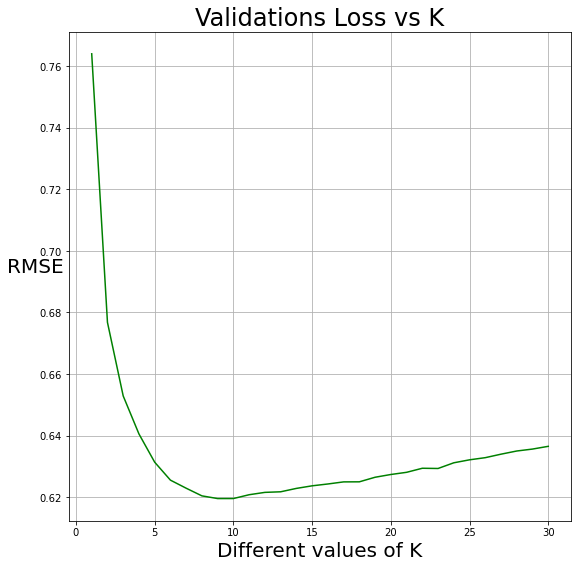

In [5]:
plt.figure(figsize=(9,9))
plt.plot(range(1, len(rmse)+1), rmse, color='green') 
plt.xlabel('Different values of K', fontsize=20) 
plt.ylabel('RMSE', fontsize=20, rotation=0) 
plt.grid(True)
plt.title("Validations Loss vs K", fontsize=24)
plt.show() 

In [6]:
print('Lowest rmse value comes when K is:{}'.format(np.argmin(rmse)+1))

Lowest rmse value comes when K is:9


In [8]:
params = {'poly__degree':list(range(1,4)),
          'knn__n_neighbors': list(range(6, 12))}
print(params)

pipe = Pipeline(steps=[('poly', PolynomialFeatures()),
                       ('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor())])

#validate model with his parameters
gs = GridSearchCV(estimator=pipe, 
                  param_grid=params, 
                  cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_

# printing best estimator values
print(reg_knn) 

{'poly__degree': [1, 2, 3], 'knn__n_neighbors': [6, 7, 8, 9, 10, 11]}
Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=8))])
